<a href="https://colab.research.google.com/github/OlivlfilipeOliveira/dominio_de_frequencia_furier_PDI/blob/main/Filtragem_de_dom%C3%ADnio_de_frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**Universidade Federal de Alagoas - UFAL**

## Campus Arapiraca

## Processamento Digital de Imagens

## **Filtragem no domínio de frequência**

Filipe da Silva Oliveira

filipe.oliveira@arapiraca.ufal.br


</center>

# Como funcona o Domínio de Frequência?

* Ela realiza operações com a chamada **Transformada de Fourier** a partir de uma imagem e não diretamente na própria imagem.

* Para realizar o processo, são executados os seguintes passos:
 * Inicialmente é aplicada a **Transformada de Fourier** que traz a representação da imagem no espaço para o domínio de frequência;
 * Como os valores no domínio de frequência geralmente são altos, é utilizada uma **função logarítmica** para baixar os valores e assim melhorar a visualização;
 * Depois, é aplicada a operação **shift**, que basicamente leva as baixas frequências para o centro e as altas frequências para as bordas;
 * Nesse momento, pode-se aplicar algum **filtro** na imagem (no domínio de frequência);
 * Com o filtro aplicado é feito o **shift inverso** para retornar com as baixas frequências nas bordas e as altas no centro;
 * Por fim, é calculada a **transformada inversa de Fourier** para trazer o resultado da imagem filtrada no domínio de frequência para o domínio espacial.


**Aplicação da transformada de Furier em Python**

In [51]:
from google.colab import drive

#montando google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#Importando bibliotecas necessárias para realização da tansformada 
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
from matplotlib import pyplot as plt

#importando repositório de imagens
image_path = "/content/drive/MyDrive/UFAL/ImagensPDI/"

**Lendo imagem em tom cinza**

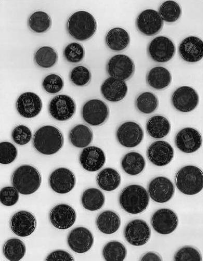

In [53]:
#Lendo imagem na cor cinza
image = cv.cvtColor(io.imread(image_path + "coins.jpg"), cv.COLOR_RGBA2GRAY)

cv2_imshow(cv.resize(image, None, fx=.52, fy=.52))

Aplicando a transformada de Furier a partir da biblioteca Numpy

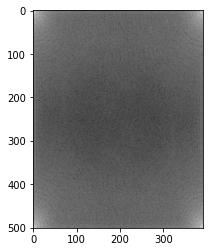

In [54]:
#Transformada de Fourier
image_fft = np.fft.fft2(image)

plt.imshow(np.log(1+np.abs(image_fft)), cmap="gray")
plt.show()

Aplicando Shift

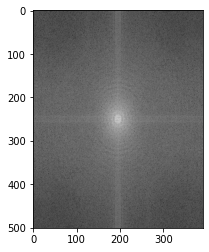

In [55]:
#Shift

image_fft_shift = np.fft.fftshift(image_fft)

plt.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
plt.show()

Aplicando Shift inverso

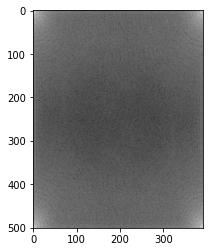

In [56]:
#Shift inverso

image_fft_shift_inverso = np.fft.ifftshift(image_fft_shift)

plt.imshow(np.log(1+np.abs(image_fft_shift_inverso)), cmap="gray")
plt.show()

#Aplicando a transformada de Furier inversa. **Observe que como não foi aplicado nenhum filtro, a imagem continua como a original, ou seja, sem perda de informação.**


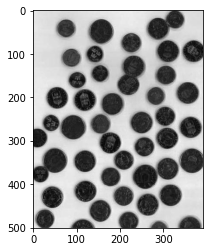

In [57]:
#Transformada de Furier inversa

image_fft_inverso = np.fft.ifft2(image_fft_shift_inverso)

plt.imshow(np.abs(image_fft_inverso), cmap="gray")
plt.show()

#**FILTROS NO DOMÍNIO DE FREQUÊNCIA**

## Passa-baixa ideal e passa-altaideal; passa-baixa Butterworth e passa-alta Butterworth; passa-baixa gaussiano e passa-alta Gaussano.



* Filtros Passa-baixa
   * Baixas frequências estão relacionadas a intensidades de variação lenta
   * Remove frequências altas, deixando passar frequências mais baixas.
   * O filtro passa-baixa "ideal" remove todas as frequências além de um
certo limiar.
   * Efeito: Borramento da imagem.



* Filtros Passa-alta
   * Altas frequências estão relacionadas a mudanças abruptas de intensidade
   * Remove frequências baixas, deixando passar frequências mais altas.
   * O filtro passa-alta "ideal" remove todas as frequências abaixo de um
certo limiar.
   * Realçam detalhes abruptos de uma imagem
**OBS:** para implementar os filtros passa-alta, basta inverter as fórmulas dos filtros passa-baixa.

### **Importante:** A partir deste ponto serão apresentados os filtros de domínios de frequência aplicados na imagem juntamente com a transformada de Furier. É importante ressaltar que para facilitar o entendimento é necessário comprrender os conceitos apresentados anteriormente. Desde os passos da Transformada de Furier até as definições de Filtro passa-alta e Filtro passa-baixa.

### **Filtro passa-baixa ideal**

* Um filtro passa-baixa deixa passar, sem atenuação, todas as frequências em um cı́rculo de raio $D_0$ a partir da origem e "recorta" todas as frequências fora desse cı́rculo:
$$
H(u,v) = 
\begin{cases}
    1,& \text{se } D(u,v) \leq D_0\\
    0,& \text{se } D(u,v) > D_0
\end{cases}
$$
sendo $D_0$ uma constante positiva e $D(u,v)$ a distância entre um ponto $(u,v)$ do domı́nio da frequência e o centro do retângulo de frequência.



# Código para o Filtro passa baixa ideal

In [58]:
### Distancia Euclidiana

def distance(point_1,point_2):
    from math import sqrt
    return sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)

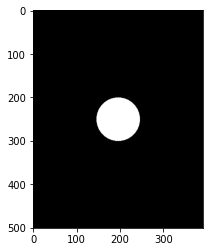

In [59]:
### Filtro passa baixa ideal

def passa_baixa_ideal(D_0, imageShape):
    base = np.zeros(imageShape[:2])
    rows, cols = imageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D_0:
                base[y,x] = 1
    return base

LowPass = passa_baixa_ideal(50, image.shape) #passando imagem lida anteriormente
plt.imshow(np.abs(LowPass), "gray")#ixibindo imagem com filtro passa-baixa ideal

plt.show()

# Aplicando shift

Como os filtros são aplicados na imagem dentro do Domínio de Frequência, é necessário pegar o resultado de processamento da transformada de fourier junto do shift e multiplicar pelo filtro.

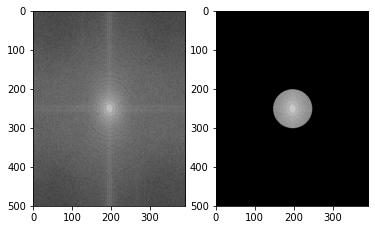

In [60]:
#multiplicação da imagem original no domínio de frequência pela função do filtro

#LowPassCenter = image_fft_shift * passa_baixa_ideal(50, image.shape)
LowPassCenter = image_fft_shift * LowPass

#mostrando comparação do shit com a imagem sem o filto e com o filtro
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassCenter)), cmap="gray")

# Aplicando Shift inverso

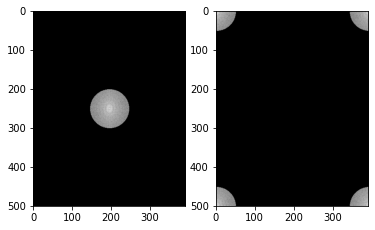

In [61]:
LowPass_shift_inverse = np.fft.ifftshift(LowPassCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPassCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_shift_inverse)), cmap="gray")

# Aplicando Tranformada de Furier inversa

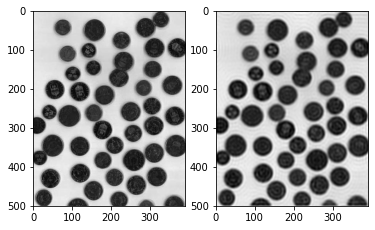

In [62]:
inverse_LowPass = np.fft.ifft2(LowPass_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass), cmap="gray")

No bloco de código acima é possível observar que a segunda imagem, que foi aplicada o filtro, está um pouco distorcida em relação a imagem original, isso porque foi aplicado o filtro.

#Inserindo parametros diferentes e comparando resultados para o filtro passa-baixa ideal

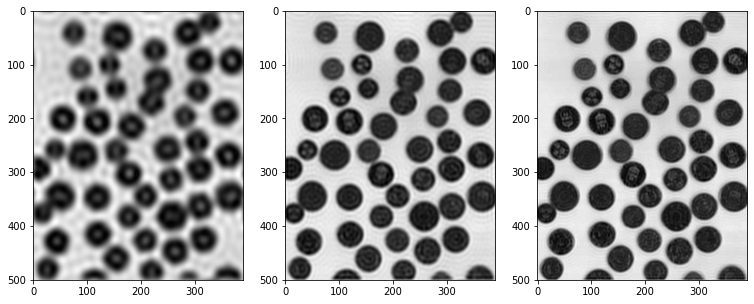

In [63]:
#Para D_0 = 20
#Aplicando filtro_baixa_ideal
LowPassIdeal20 = passa_baixa_ideal(20, image.shape) #passando imagem lida anteriormente
#Aplicando shift
LowPassCenter20 = image_fft_shift * LowPassIdeal20
#Aplicando shift inverso
LowPass_shift_inverse20 = np.fft.ifftshift(LowPassCenter20)
#Aplicando tranformada de Furier inversa
inverse_LowPass20 = np.fft.ifft2(LowPass_shift_inverse20)


#Para D_0 = 80
#Aplicando filtro_baixa_ideal
LowPassIdeal80 = passa_baixa_ideal(80, image.shape) #passando imagem lida anteriormente
#Aplicando shift
LowPassCenter80 = image_fft_shift * LowPassIdeal80
#Aplicando shift inverso
LowPass_shift_inverse80 = np.fft.ifftshift(LowPassCenter80)
#Aplicando tranformada de Furier inversa
inverse_LowPass80 = np.fft.ifft2(LowPass_shift_inverse80)

#mostrando os resultados
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(np.abs(inverse_LowPass20), cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(np.abs(inverse_LowPass), cmap="gray")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(np.abs(inverse_LowPass80), cmap="gray")


Quando observamos os resultados, percebemos que quanto maior o raio aparentemente com mais qualidade a imagem fica (nesse caso raio = 80)

### **Filtro passa-alta ideal**
$$
H(u,v) = 
\begin{cases}
    0,& \text{se } D(u,v) \leq D_0\\
    1,& \text{se } D(u,v) > D_0
\end{cases}
$$


# Código para o filtro passa-alta ideal


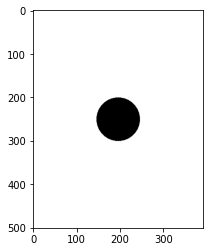

In [64]:
#filtro passa-alta ideal

def passa_alta_ideal(D_0, imageShape):
    base = np.zeros(imageShape[:2])
    rows, cols = imageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) > D_0:
                base[y,x] = 1
    return base

HighPass = passa_alta_ideal(50, image.shape)
plt.imshow(np.abs(HighPass), "gray")

plt.show()

# Aplicando shift

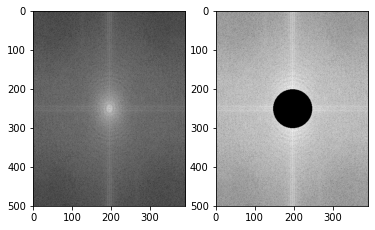

In [65]:
HighPassCenter = image_fft_shift * HighPass

#mostrando comparação do shit com a imagem sem o filto e com o filtro
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassCenter)), cmap="gray")

# Aplicando Shift inverso

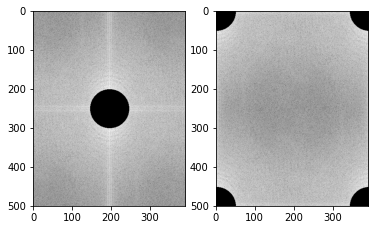

In [66]:
HighPass_shift_inverse = np.fft.ifftshift(HighPassCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_shift_inverse)), cmap="gray")

#Aplicando transformada de  Furier Inversa

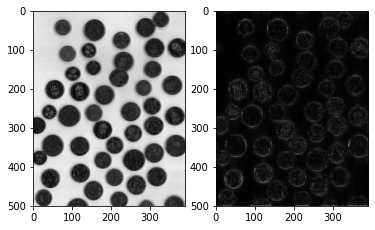

In [67]:
inverse_HighPass = np.fft.ifft2(HighPass_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPass), cmap="gray")

A partir da imagem acima observa-se uma diferente enorme das cores em comparação com a imagem original e a imagem com o filtro.


#Inserindo parametros diferentes e comparando resultados para o filtro passa-alta ideal



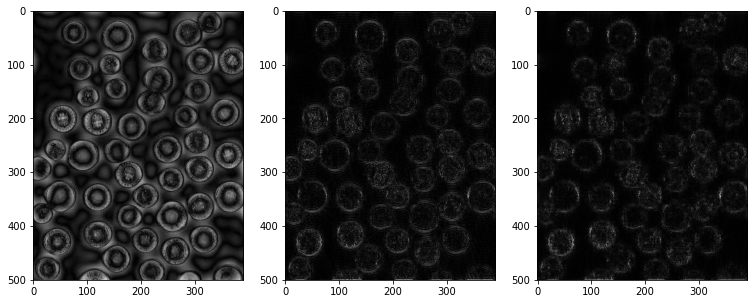

In [68]:
#Para D_0 = 10
#Aplicando filtro_baixa_ideal
highPassIdeal10 = passa_alta_ideal(10, image.shape) #passando imagem lida anteriormente
#Aplicando shift
highPassCenter10 = image_fft_shift * highPassIdeal10
#Aplicando shift inverso
highPass_shift_inverse10 = np.fft.ifftshift(highPassCenter10)
#Aplicando tranformada de Furier inversa
inverse_highPass10 = np.fft.ifft2(highPass_shift_inverse10)


#Para D_0 = 90
#Aplicando filtro_baixa_ideal
highPassIdeal90 = passa_alta_ideal(90, image.shape) #passando imagem lida anteriormente
#Aplicando shift
highPassCenter90 = image_fft_shift * highPassIdeal90
#Aplicando shift inverso
highPass_shift_inverse90 = np.fft.ifftshift(highPassCenter90)
#Aplicando tranformada de Furier inversa
inverse_highPass90 = np.fft.ifft2(highPass_shift_inverse90)


#mostrando os resultados
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(np.abs(inverse_highPass10), cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(np.abs(inverse_HighPass), cmap="gray")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(np.abs(inverse_highPass90), cmap="gray")

Nessa comparação aparemente quanto maior o raio mais distorcida fica a imagem, perdendo as cores.

### **Filtro passa-baixa Butterworth**

* A função de transferência do filtro passa-baixa Butterworth (BLFP) de ordem $n$, e com frequência de corte a uma distância $D_0$ da origem é definida como:
$$
H(u,v) = \frac{1}{1 + [\frac{D(u,v)}{D_0}]^{2n}}
$$
onde $D(u,v)$ é a distância entre um ponto $(u,v)$ no domı́nio da frequência e o centro da função frequência

* Diferentemente do filtro ideal, a BLFP não tem descontinuidade abrupta.

* Não apresenta efeito de <i>ringing</i>


#Código para o filtro passa-baixa Butterworth

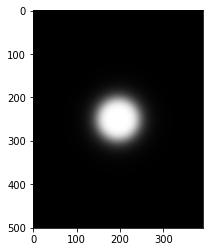

In [69]:
### Filtro passa baixa Butterworth

def passa_baixa_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D_0)**(2*n))
    return base

# LowPass_BW = passa_baixa_butterworth(50, image.shape, 20)
LowPass_BW = passa_baixa_butterworth(50, image.shape, 3)
plt.imshow(np.abs(LowPass_BW), "gray")

plt.show()

# Aplicando Shift

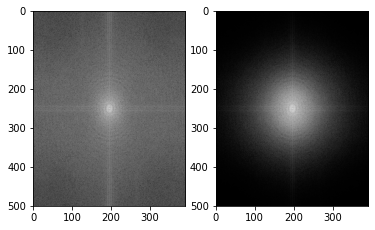

In [70]:
LowPass_BW_Center = image_fft_shift * LowPass_BW

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_BW_Center)), cmap="gray")

#Aplicando shift inverso

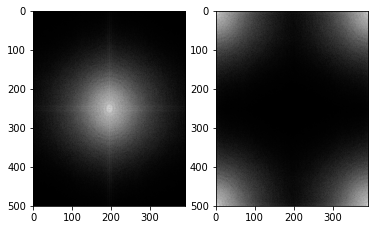

In [71]:
LowPass_BW_shift_inverse = np.fft.ifftshift(LowPass_BW_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPass_BW_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_BW_shift_inverse)), cmap="gray")

#Aplicando Tranformada de Furier inversa

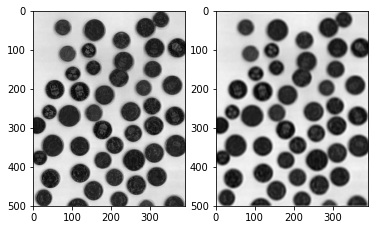

In [72]:
inverse_LowPass_BW = np.fft.ifft2(LowPass_BW_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass_BW), cmap="gray")

Assim como no filtro o ideal, o filtro Butterworth também tem um certa diferença em relação a imagem original.

#Inserindo parametros diferentes e comparando resultados para o filtro passa-baixa Butterworth


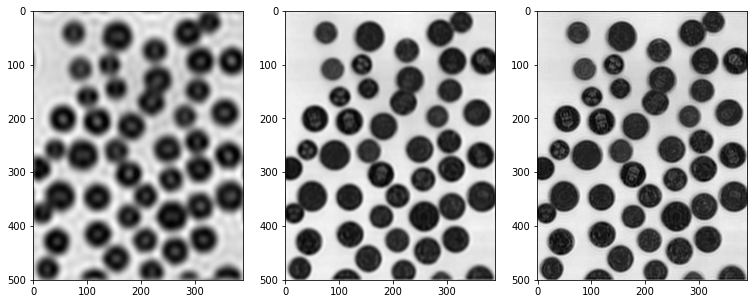

In [73]:
#Para D_0 = 20 e n = 10
#Aplicando filtro_baixa_butterworth
LowPassButterworth20 = passa_baixa_butterworth(20, image.shape, 10) #passando imagem lida anteriormente
#Aplicando shift
LowPassCenter20 = image_fft_shift * LowPassButterworth20
#Aplicando shift inverso
LowPass_shift_inverse20 = np.fft.ifftshift(LowPassCenter20)
#Aplicando tranformada de Furier inversa
inverse_LowPass20 = np.fft.ifft2(LowPass_shift_inverse20)


#Para D_0 = 80 e n = 17
#Aplicando filtro_baixa_butterworth
LowPassButterworth80 = passa_baixa_butterworth(80, image.shape, 17) #passando imagem lida anteriormente
#Aplicando shift
LowPassCenter80 = image_fft_shift * LowPassButterworth80
#Aplicando shift inverso
LowPass_shift_inverse80 = np.fft.ifftshift(LowPassCenter80)
#Aplicando tranformada de Furier inversa
inverse_LowPass80 = np.fft.ifft2(LowPass_shift_inverse80)

#mostrando os resultados
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(np.abs(inverse_LowPass20), cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(np.abs(inverse_LowPass_BW), cmap="gray")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(np.abs(inverse_LowPass80), cmap="gray")


Nesse caso, quando menor o raio e mais alto a ordem, mais distorcido fica a imagem.

### **Passa-alta Butterworth**

$$
H(u,v) = \frac{1}{1 + [\frac{D_0}{D(u,v)}]^{2n}}
$$


#Código para o filtro passa-alta Butterworth

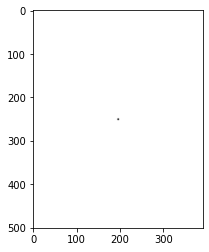

In [74]:
#filtro passa-alta butterworth

def passa_alta_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1 + D_0/(distance((y,x),center))**(2*n))

    return base

HighPass_BW = passa_alta_butterworth(50, image.shape, 3)
plt.imshow(np.abs(HighPass_BW), "gray")

plt.show()

#Aplicando Shift

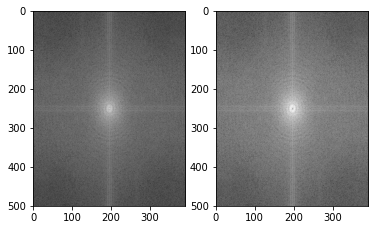

In [75]:
HighPass_BW_Center = image_fft_shift * HighPass_BW

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_BW_Center)), cmap="gray")

#Aplicando Shift Inverso

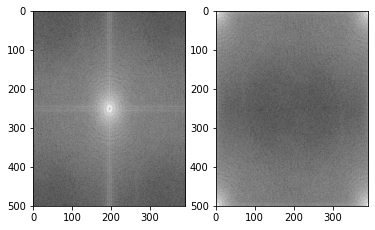

In [76]:
HighPass_BW_shift_inverse = np.fft.ifftshift(HighPass_BW_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPass_BW_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_BW_shift_inverse)), cmap="gray")

#Aplicando transformada de Furier inversa 



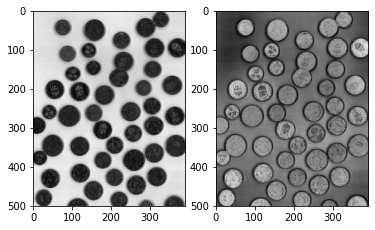

In [77]:
inverse_HighPass_BW = np.fft.ifft2(HighPass_BW_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPass_BW), cmap="gray")

Aplicando o filtro passa-alto Butterworth e comparando com a imagem original, percebe-se que a imagem com o filtro (da direita) aparece mais escura.

#Inserindo parametros diferentes e comparando resultados para o filtro passa-alta Butterworth

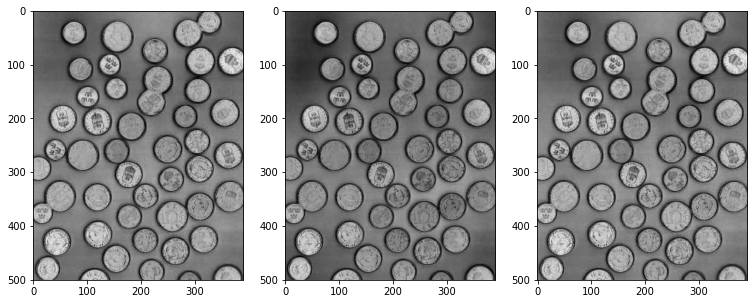

In [78]:
#Para D_0 = 10 e n = 10
#Aplicando filtro_alta_Butterworth
highPassButterworth10 = passa_alta_butterworth(10, image.shape, 10) #passando imagem lida anteriormente
#Aplicando shift
highPassCenter10 = image_fft_shift * highPassButterworth10
#Aplicando shift inverso
highPass_shift_inverse10 = np.fft.ifftshift(highPassCenter10)
#Aplicando tranformada de Furier inversa
inverse_highPass10 = np.fft.ifft2(highPass_shift_inverse10)


#Para D_0 = 90 n = 17
#Aplicando filtro_baixa_butterworth
highPassButterWorth90 = passa_alta_butterworth(90, image.shape, 17) #passando imagem lida anteriormente
#Aplicando shift
highPassCenter90 = image_fft_shift * highPassButterWorth90
#Aplicando shift inverso
highPass_shift_inverse90 = np.fft.ifftshift(highPassCenter90)
#Aplicando tranformada de Furier inversa
inverse_highPass90 = np.fft.ifft2(highPass_shift_inverse90)


#mostrando os resultados
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(np.abs(inverse_highPass10), cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(np.abs(inverse_HighPass_BW), cmap="gray")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(np.abs(inverse_highPass90), cmap="gray")

Aparentemente quando maior a ordem mais clara fica as partes escuras da imagem.


### **Filtro passa-baixa gaussiano**

* Os filtros passa-baixa gaussianos (GLPF) de duas dimensões têm a forma:
$$
H(u,v) = e^{\frac{-D^2(u,v)}{2D_0^2}}
$$
sendo $D(u,v)$ a distância a partir do centro do retângulo de frequência e $D_0$ a frequência de corte.

* A transformada inversa do GLPF também é uma gaussiana;

* Não apresenta efeito de <i>ringing</i>

#Código para o filtro passa-baixa Gaussiano


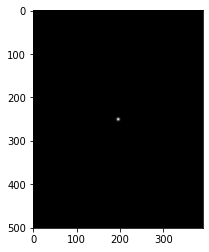

In [79]:
#filtro passa-baixa gaussiano

def passa_baixa_gaussiano(D_0, imgageShape, n):
    e = 1.1
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base [y,x] = e ** -(distance((y,x),center))**2/(2*D_0**2)
    return base

LowPass_G = passa_baixa_gaussiano(50, image.shape, 3)
plt.imshow(np.abs(LowPass_G), "gray")

plt.show()

#Aplicando shift

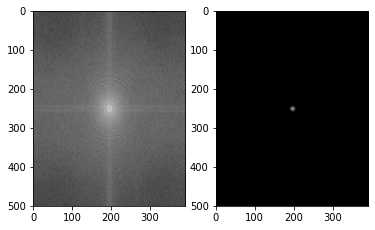

In [80]:
LowPass_G_Center = image_fft_shift * LowPass_G

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_G_Center)), cmap="gray")

#Aplicando Shift inverso

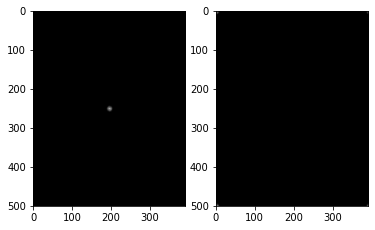

In [81]:
LowPass_G_shift_inverse = np.fft.ifftshift(LowPass_G_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPass_G_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_G_shift_inverse)), cmap="gray")

#Aplicando Transformada de Furier inversa

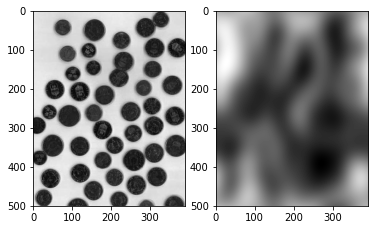

In [82]:
inverse_LowPass_G = np.fft.ifft2(LowPass_G_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass_G), cmap="gray")

Aplicando o filtro passa-baixa Gaussiano a segunda imagem fica completamente distorcida.

#Inserindo parametros diferentes e comparando resultados para o filtro passa-baixa Gaussiano

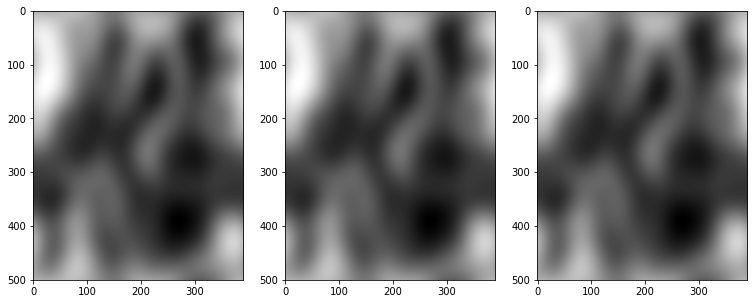

In [83]:
#Para D_0 = 20 e n = 10
#Aplicando filtro_baixa_gausiano
LowPassGaussiano20 = passa_baixa_gaussiano(20, image.shape, 10) #passando imagem lida anteriormente
#Aplicando shift
LowPassCenter20 = image_fft_shift * LowPassGaussiano20
#Aplicando shift inverso
LowPass_shift_inverse20 = np.fft.ifftshift(LowPassCenter20)
#Aplicando tranformada de Furier inversa
inverse_LowPass20 = np.fft.ifft2(LowPass_shift_inverse20)


#Para D_0 = 80 e n = 17
#Aplicando filtro_baixa_gaussiano
LowPassGaussiano80 = passa_baixa_gaussiano(80, image.shape, 17) #passando imagem lida anteriormente
#Aplicando shift
LowPassCenter80 = image_fft_shift * LowPassGaussiano80
#Aplicando shift inverso
LowPass_shift_inverse80 = np.fft.ifftshift(LowPassCenter80)
#Aplicando tranformada de Furier inversa
inverse_LowPass80 = np.fft.ifft2(LowPass_shift_inverse80)

#mostrando os resultados
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(np.abs(inverse_LowPass20), cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(np.abs(inverse_LowPass_G), cmap="gray")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(np.abs(inverse_LowPass80), cmap="gray")


Quanto mais alto a ordem mais distorcido fica a imagem. E quando maior o raio deixa deixa em evidencia a cor escura.

### **Passa-alta Gaussiano**

$$
H(u,v) = 1 - e^{\frac{-D^2(u,v)}{2D_0^2}}
$$


#Código para o filtro passa-alta Gaussiano

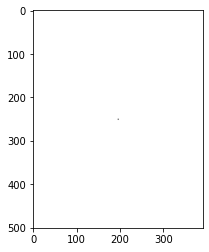

In [84]:
#filtro passa-alta gaussiano

def passa_alta_gaussiano(D_0, imgageShape, n):
    e = 2.7
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - e ** -(distance((y,x),center))**2/(2*D_0**2)
    return base

HighPass_G = passa_alta_gaussiano(50, image.shape, 3)
plt.imshow(np.abs(HighPass_G), "gray")

plt.show()

Aplicando Shift

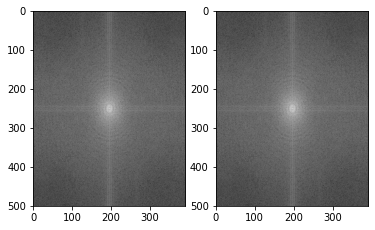

In [85]:
HighPass_G_Center = image_fft_shift * HighPass_G

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_G_Center)), cmap="gray")

#Aplicando Shift inverso

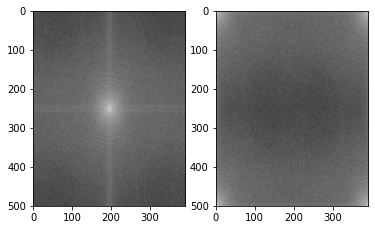

In [86]:
HighPass_G_shift_inverse = np.fft.ifftshift(HighPass_G_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPass_G_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_G_shift_inverse)), cmap="gray")

#Aplicando Transformada de Furier inversa

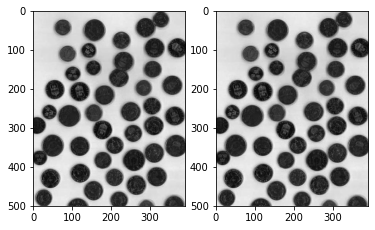

In [87]:
inverse_HighPass_G = np.fft.ifft2(HighPass_G_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPass_G), cmap="gray")

A imagem com filtro Gaussinao aparenta não diferencia muito da imagem origial, porém, percebesse uma pequena diferença na qualidade da imagem.

#Inserindo parametros diferentes e comparando resultados para o filtro passa-alta Gaussiano


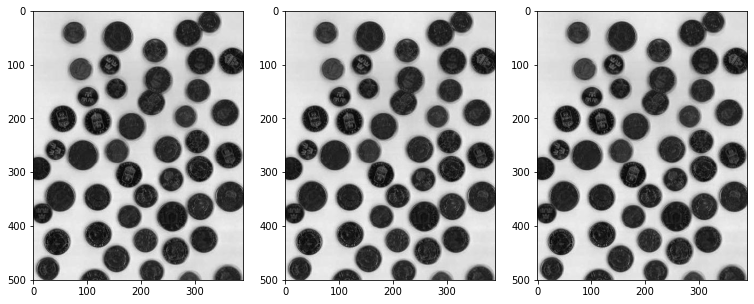

In [88]:
#Para D_0 = 10 e n = 10
#Aplicando filtro_alta_Gaussiano
highPassGaussiano10 = passa_alta_gaussiano(10, image.shape, 10) #passando imagem lida anteriormente
#Aplicando shift
highPassCenter10 = image_fft_shift * highPassGaussiano10
#Aplicando shift inverso
highPass_shift_inverse10 = np.fft.ifftshift(highPassCenter10)
#Aplicando tranformada de Furier inversa
inverse_highPass10 = np.fft.ifft2(highPass_shift_inverse10)


#Para D_0 = 90 n = 17
#Aplicando filtro_alta_Gaussiano
highPassGaussiano90 = passa_alta_gaussiano(90, image.shape, 17) #passando imagem lida anteriormente
#Aplicando shift
highPassCenter90 = image_fft_shift * highPassGaussiano90
#Aplicando shift inverso
highPass_shift_inverse90 = np.fft.ifftshift(highPassCenter90)
#Aplicando tranformada de Furier inversa
inverse_highPass90 = np.fft.ifft2(highPass_shift_inverse90)


#mostrando os resultados
fig = plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(np.abs(inverse_highPass10), cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(np.abs(inverse_HighPass_G), cmap="gray")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(np.abs(inverse_highPass90), cmap="gray")

Aparentemente parâmetros mais altos evidenciam mais as cores escuras.